# MDF Earthquake Response - 3

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' # used to make plots look nicer
from ema_examples.dynamics import P09_07
from ema.utilities.ipyutils import disp_sbs 

In [2]:
ft = 12
h = 12*ft
m = 80/386.4
E = 29000
I = 1000
EI = E*I
RHA = False

N = I = 3
mdl = P09_07(h = h, m = m, EI = EI)
# fig, ax = plt.subplots()
# em.plot_structure(mdl, ax)

In [3]:
m, k = em.Mass_matrix(mdl), em.K_matrix(mdl)
k, m = em.analysis.StaticCondensation(k, m)
disp_sbs(m.df, k.df)

,$u_{{1}}$,$u_{{2}}$,$u_{{3}}$
$u_{{1}}$,0.207039,0.000000,0.00000
$u_{{2}}$,0.000000,0.207039,0.00000
$u_{{3}}$,0.000000,0.000000,0.10352
,$1$,$2$,$3$
$P_{1}$,466.177984,-233.088992,0.000000
$P_{2}$,-233.088992,466.177984,-233.088992
$P_{3}$,0.000000,-233.088992,233.088992


In [4]:
freq2, Phi = em.analysis.ModalAnalysis(mdl, norm='last')
Phi

array([[ 5.00000000e-01, -1.00000000e+00,  5.00000000e-01],
       [ 8.66025404e-01,  2.28035323e-16, -8.66025404e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

In [5]:
omega = np.array([np.sqrt(np.real(freq)) for freq in freq2])
omega

array([17.36843442, 47.45144529, 64.81987972])

In [6]:
M = Phi.T@m@Phi
K = Phi.T@k@Phi

## Modal expansion of earthquake forces

Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur.

$$\mathrm{p}_{\mathrm{eff}}(t)=-\mathrm{m} \iota \ddot{u}_{g}(t)$$

$$\mathbf{m} \iota=\sum_{n=1}^{N} \mathbf{s}_{n}=\sum_{n=1}^{N} \Gamma_{n} \mathbf{m} \phi_{n}$$

Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [24]:
I = N = 3
iota = np.ones(I)
L = np.array([sum(Phi.T[n,i]*sum(m[i,j]*iota[j] for j in range(I)) for i in range(I)) for n in range(N)])
L = Phi.T@m@iota
L

Structural_Vector([ 0.38634066, -0.10351967,  0.02773801])

In [8]:
gamma = np.array([L[n]/M[n,n]  for n in range(N)])
gamma

array([ 1.24401694, -0.33333333,  0.0893164 ])

In [9]:
s = np.array([gamma[n]*(m@Phi.T[n]) for n in range(N)]).T
s

array([[ 1.28780221e-01,  6.90131125e-02,  9.24600388e-03],
       [ 2.23053886e-01, -1.57374274e-17, -1.60145485e-02],
       [ 1.28780221e-01, -3.45065562e-02,  9.24600388e-03]])

## a) Determine $A_n$ and $D_n$

In [10]:
# Values read from response spectrum:
D = np.array([0.877, 0.10, 0.04]) # inches
D

array([0.877, 0.1  , 0.04 ])

In [11]:
# if RHA:
D = []
u = []
for i, w in enumerate(omega):
    zeta = 0.05
    t, d = em.analysis.ElcentroRHA(zeta, w)
    D.append(max(d))
    u.append([t,d])
print(D)

[0.923352660303864, 0.09304519274915218, 0.03763691127115581]


Plot modes:

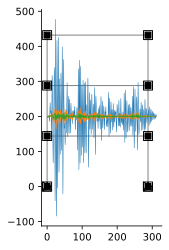

In [12]:
fig2, ax2 = plt.subplots()
em.plot_structure(mdl, ax2)
for i in range(3):
    plt.plot(10*u[i][0],200+300*u[i][1], linewidth=0.5)
plt.show()

In [13]:
A = np.array([D[n]*omega[n]**2 for n in range(N)])
A

array([278.54088513, 209.50424621, 158.13587895])

## b) Modal response quantities

### Floor displacements

In [14]:
Un = np.array([[gamma[n]*Phi[i,n]*D[n] for n in range(N)]for i in range(I)])
Un

array([[ 5.74333174e-01,  3.10150642e-02,  1.68079666e-03],
       [ 9.94774237e-01, -7.07253019e-18, -2.91122522e-03],
       [ 1.14866635e+00, -3.10150642e-02,  3.36159333e-03]])

### Story shears

In [15]:
Vin = np.array([[sum(s[j,n]*A[n] for j in range(i, I)) for n in range(N)] for i in range(I)])
Vin

array([[133.87074037,   7.22927006,   0.3917752 ],
       [ 98.0001836 ,  -7.22927006,  -1.07034975],
       [ 35.87055677,  -7.22927006,   1.46212495]])

### Floor and base moments

In [16]:
M_base = np.array([sum(s[i,n]*h*(i+1)*A[n]  for i in range(I)) for n in range(N)])
M_base # kip-inch

array([38554.77322731, -1041.01488801,   112.8312575 ])

In [17]:
H = [h*(i+1) for i in range(I)]
H

[144, 288, 432]

In [18]:
M_floor = np.array([[sum((H[j]-h*(i+1))*s[j,n]*A[n] for j in range(i,N)) for n in range(N)] for i in range(I)])
M_floor # kip-inch

array([[19277.38661365, -2082.02977602,    56.41562875],
       [ 5165.36017531, -1041.01488801,   210.54599284],
       [    0.        ,     0.        ,     0.        ]])

## c) Peak modal response combination

For well-seperated modal frequencies, the SRSS method is employed.

In [19]:
def ro(rno):
    return np.sqrt(sum(rn**2 for rn in rno))

### Floor displacements

In [20]:
ro(Un.T)

array([0.57517246, 0.9947785 , 1.14908991])

### Story shears

In [21]:
ro(Vin.T)

array([134.06636775,  98.27229508,  36.62099122])

### Floor and base overturning moments

In [22]:
ro(M_base)

38568.98989471707

In [23]:
ro(M_floor)

array([19957.41918167,  2327.78005518,   217.97325126])